Gender Discrimination, a case study with data from the Houston College of Medicine in '94 and '95
===================================================

In [18]:
Name = ['Mert Sami      ', 'Myrthe Peeters ']
SNR = [' 2013923', ' 1258747']

titles = ['Name', ' SNR']
data = [titles] +list(zip(Name, SNR))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(15) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

Name           | SNR           
-------------------------------
Mert Sami      | 2013923       
Myrthe Peeters | 1258747       


Link to [Mert Sami's Github](https://github.com/mertsami/aea-assign-final)

link to [Myrthe Peeters' Github](https://github.com/Myrthep87/aea-assign-final)

# Abstract

Research was conducted to investigate whether female doctors at the Houston College Of Medicine were being discriminated against in being given promotions as well as in setting their salaries.

The results show that salaries of female doctors are indeed significantly lower. However they also show that male doctors have significantly more experience have and are significantly more often part of the board. 
In addition to that they also have a much larger fraction within a higher rank compared to the female doctors. This could be a reason for having a higher salary. It could however also be an indicator for discrimination.

Thus, it can (partly) be explained why the male doctors have a higher salary. However this resulted from women being discriminated against. Discrimination led to a lower wage for women.

# Research Question

Are female doctors in Houston College of Medicine being discriminated against in giving promotions and setting salaries compared to their male counterparts in 1994 and 1995?

# Motivation 

In modern society, racism and discrimination are highly relevant topics. These topics are being discussed on countless occasions, given a wide variety of situations under which they occur. Recently, women spoke up about sexual harassment, while using #METOO, this mainly concerned the entertainment industry. Within the same industry, where you see a lot of stereotyping, it is also still the case that males have a significantly larger pay cut compared to females. Taking the initiative to discuss these topics has only been accepted and happening in recent years. This also goes for the topic of the increasing of gender equality. Not only with respect to the number of female managers, directors, politicians or other important job positions but also with respect to the equalization of salaries between male and female. This motivated us to analyze some data on salaries of males compared to females back in the day, when this was not a (daily) topic of discussion. 

# Introduction

Below, a YouTube video by _The Economist_ is displayed. In this video an explaination is given as to why women earn less then men and that this is not merely due to a lower hourly wage for similar occupations or functions. In addition to ones task, other important factors or variables, like experience, commensurate your total salary. Such that it is constructed in a fair manner.

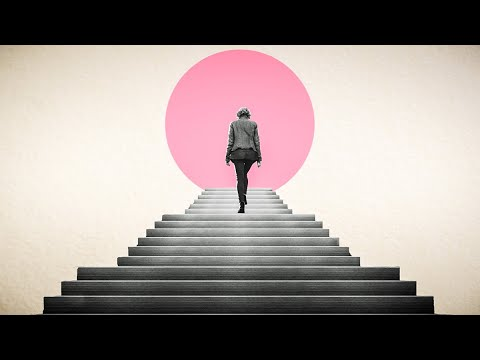

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('mpE8ttCEd-w')


# Data

The source from which the data is retained can be found [here](https://www.kaggle.com/hjmjerry/gender-discrimination/data). 

Several female doctors of Houston College of Medicine went to court. Their case was titled: '_ VII of the Civil Rights Act of 1964, 42 U.S.C. 200e et seq._'. The reason for them to go to court was that they claimed that the College had systematically carried out discrimination against women. This discrimination was supposedly established in giving promotions and setting doctors salaries.

The female doctors presented the court with data that they had collected. In this way they wanted to show that female faculty at the school were less likely to be full professors, more likely to be assistant professors, and earn less money, on average, compared to their male colleagues.

Next the nine variables that are to be found in the dataset will be stated and further explained.
1- Dept. It stands for department. The doctors can be part of 6 departments at the Houston College. Namely, 1=Biochemistry/Molecular Biology, 2=Physiology, 3=Genetics, 4=Pediatrics, 5=Medicine and 6=Surgery. 
2- Gend. This stands for gender, 1=Male, 0=Female
3- Clin. Stands for clinical, 1=Primarily clinical emphasis, 0=Primarily research emphasis
4- Cert. Stands for whether a doctor is board certified or not, 1=Board certified, 0=not certified
5- Prate. This means Publication rate (nr. of publications on cv)/(nr. of years between CV date and MD date)
6- Exper. Stands for expertise, the number of years since obtaining their MD.
7- Rank. Stands for the doctor's rank. 1=Assistant, 2=Associate, 3=Full professor (this is a proxy for productivity)
8- Sal94. Is the salary in academic year 1994
9- Sal95 Is the alary after increment to 1994

In [3]:
# This cell will open a new tab, which directs you to the dataset.
import webbrowser
urls = ['https://www.kaggle.com/hjmjerry/gender-discrimination/data']

for url in urls:
    webbrowser.open_new_tab(url)

In [20]:
# Next a few packages will be imported, they are necessary for conducting code in the rest of this document.
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import arange, optimize
from scipy.stats import wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# The data that was used comes from a excel document called Lawsuit.
# A dataframe (df) is created that contains all data from this excel document. 
df_lawsuit = pd.read_csv('Lawsuit.csv')
df_lawsuit

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
5,6,1,1,0,1,7.7,10,3,79714,87531
6,7,1,1,0,1,8.3,9,2,89781,99972
7,8,1,1,1,1,5.3,11,3,151423,166601
8,9,1,1,0,0,7.7,18,3,81271,85437
9,10,1,1,0,0,7.5,9,2,83018,91369


In [22]:
# Dataframes will be created for every variable within the dataframe df_lawsuit
# If you print these dataframes you will be presented with all the datapoint under the specific variable.
df_Gender = df_lawsuit.Gender.tolist()
df_Sal94 = df_lawsuit.Sal94.tolist()
df_Sal95 = df_lawsuit.Sal95.tolist()
df_Exper = df_lawsuit.Exper.tolist()
df_Rank = df_lawsuit.Rank.tolist()
df_Clin = df_lawsuit.Clin.tolist()
df_Dept = df_lawsuit.Dept.tolist()
df_Cert = df_lawsuit.Cert.tolist()

In [23]:
# Next, some of the dataframes will be printed. They will be used for the next cell in which df_malelawsuit is defined. 
# Datapoints per variable are inserted under their variable name within this new dataframe, df_malelawsuit.
df_Gender, df_Exper, df_Cert, df_Sal94, df_Sal95, df_Rank

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [24]:
# Next a new dataframe will be created.
# This is done as a first step in order to be able to conduct the Mann-Whitney u test on the data. such that the research question can be asnwered.
df_malelawsuit = pd.DataFrame({'Gender':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
                               'Exper':[9, 10, 6, 27, 10, 10, 9, 11, 18, 9, 12, 8, 18, 15, 10, 9, 16, 9, 37, 14, 27, 14, 17, 23, 8, 19, 15, 16, 15, 7, 2, 12, 7, 14, 8, 7, 16, 3, 16, 12, 8, 11, 10, 15, 9, 6, 13, 13, 6, 9, 10, 9, 8, 25, 11, 9, 27, 32, 23, 14, 11, 9, 5, 12, 18, 19, 10, 8, 4, 14, 10, 4, 14, 9, 8, 3, 12, 7, 12, 4, 5, 2, 8, 2, 5, 11, 3, 16, 5, 5, 24, 11, 5, 16, 11, 16, 16, 9, 5, 6, 9, 9, 6, 10, 9, 5, 4, 7, 11, 10, 5, 6, 17, 10, 15, 10, 5, 8, 7, 11, 7, 4, 6, 4, 2, 5, 16, 2, 4, 6, 10, 5, 14, 5, 13, 5, 4, 7, 3, 10, 1, 11, 13, 9, 4, 11, 13, 18, 12, 14, 10, 11, 10, 15, 8, 7, 12, 15, 13, 8, 6, 5, 22, 2, 18, 4, 5, 6, 6, 8, 5, 37, 3, 14, 7, 8, 14, 8, 25, 5, 8, 21, 18, 2, 10, 26, 5, 10, 16, 8, 15, 3, 5, 2, 14, 5, 13, 4, 4, 7, 7, 1, 5, 7, 6, 5, 6, 12, 6, 6, 8, 3, 6, 10, 2, 23, 8, 9, 5, 14, 3, 6, 5, 21, 16, 13, 21, 5, 11, 22, 5, 27, 5, 6, 7, 11, 13, 7, 12, 10, 10, 8, 5, 12, 7, 7, 14, 14, 16, 6, 15, 2, 25, 15, 5, 10, 8, 9, 8, 2, 5],
                               'Cert':[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                               'Sal94':[77836, 69994, 62872, 155196, 89268, 79714, 89781, 151423, 81271, 83018, 80214, 110302, 137106, 77545, 90223, 81197, 90178, 105564, 115804, 113149, 157510, 97104, 131815, 134135, 92198, 99304, 82132, 108770, 109775, 66375, 57838, 90631, 60930, 87231, 68582, 63280, 106412, 65337, 143334, 90771, 81769, 94103, 102631, 109164, 63779, 75362, 124836, 77012, 67277, 73448, 97707, 106130, 81049, 140315, 84571, 58126, 133284, 142333, 71073, 76255, 105348, 86844, 52582, 110836, 144150, 122240, 68573, 63936, 71404, 102076, 94715, 58634, 119851, 78650, 57862, 67113, 81078, 60403, 90964, 52945, 56550, 34514, 56177, 50588, 60415, 91409, 56250, 127725, 63426, 45826, 154326, 87351, 123859, 118121, 174479, 196704, 186953, 107862, 105821, 114730, 142382, 67581, 67934, 118101, 127710, 70794, 81728, 71015, 117276, 106535, 68825, 109599, 154159, 145503, 161383, 113443, 118561, 147709, 121969, 101890, 114233, 77087, 113382, 102177, 116506, 130386, 159687, 107750, 91211, 135216, 164048, 84390, 170428, 124994, 90130, 102021, 88484, 110975, 81422, 130939, 111630, 182945, 163671, 204433, 135139, 147213, 207737, 244025, 167199, 209377, 209189, 186973, 209171, 230268, 186022, 179897, 236470, 172793, 285301, 200543, 152485, 154644, 255654, 138896, 260631, 183972, 128027, 161815, 149011, 167305, 153549, 300975, 124442, 163486, 155006, 129499, 216391, 171016, 246763, 175396, 144542, 275377, 262090, 250000, 158243, 218341, 141044, 164174, 203152, 194784, 223040, 138635, 176028, 126343, 249687, 127525, 281058, 149631, 142249, 166863, 164080, 112221, 161352, 209818, 133097, 171391, 166482, 242614, 146396, 130153, 175791, 138775, 167844, 202231, 106802, 204279, 185413, 150258, 128433, 123940, 107524, 214219, 312966, 342834, 312892, 317399, 342662, 247953, 339533, 393408, 206097, 419129, 250667, 212780, 232735, 244940, 287433, 279661, 428876, 326460, 366150, 299582, 259576, 316754, 220374, 262328, 337885, 355982, 298359, 247576, 251079, 154310, 411219, 266880, 223736, 322698, 297174, 308081, 211269, 210801, 244551], 
                               'Sal95':[84612, 78497, 67756, 173220, 96099, 87531, 99972, 166601, 85437, 91369, 88676, 116654, 149222, 85041, 97640, 91800, 101828, 117743, 126989, 124432, 168673, 104090, 145843, 151837, 98155, 110321, 90058, 119697, 120208, 71139, 62907, 99079, 66190, 95385, 76987, 68420, 116959, 70166, 153524, 102927, 88896, 102983, 111125, 120696, 73033, 81615, 137791, 84536, 72721, 80294, 101617, 118258, 88505, 150710, 92879, 64522, 151373, 154372, 78715, 82466, 118635, 97061, 58923, 120397, 151887, 134882, 75286, 69526, 78589, 112009, 106608, 62601, 131050, 88661, 63728, 74272, 86221, 68828, 97303, 57841, 62323, 38675, 61652, 57431, 66323, 102511, 59530, 143348, 71068, 48138, 165884, 95429, 130292, 130697, 193342, 218955, 206984, 117240, 116932, 126118, 151698, 72896, 75659, 129862, 143799, 77113, 91764, 80747, 126139, 117574, 74209, 121829, 169191, 162253, 181196, 126189, 131704, 161814, 136415, 113893, 127955, 84890, 124153, 112844, 127815, 145073, 177706, 117214, 103513, 150489, 182049, 92512, 186726, 140026, 95908, 109758, 99505, 123139, 89202, 142566, 125268, 198762, 181774, 226581, 148117, 155826, 229706, 268210, 182401, 225498, 230270, 204769, 229301, 253090, 207634, 196338, 265121, 184391, 297397, 219584, 168170, 170967, 285939, 152284, 284841, 201691, 142963, 173837, 163795, 183834, 168707, 332119, 131361, 175271, 169118, 141661, 234992, 189308, 279255, 189904, 158513, 294336, 289778, 276163, 177587, 245432, 157509, 183538, 216873, 217478, 239253, 149539, 192799, 136988, 267554, 139017, 313400, 165420, 154386, 189852, 180937, 126149, 177997, 233774, 147327, 185895, 180608, 265856, 161031, 139887, 195678, 152231, 189487, 225599, 114961, 227790, 207462, 160253, 145718, 138566, 116283, 236305, 336960, 367284, 344801, 345204, 369712, 273737, 387205, 435572, 220899, 472589, 270417, 237094, 261236, 269554, 314926, 317179, 462342, 364139, 408898, 339637, 280168, 349294, 239614, 295619, 376651, 389994, 320315, 271773, 275246, 171664, 455468, 297902, 248014, 356961, 323699, 339664, 241577, 233905, 265502],
                               'Rank':[3, 2, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3, 2, 2, 3, 1, 2, 3, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 1, 1, 1, 2, 2, 1, 3, 2, 3, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 1]})

In [25]:
# within the dataset, df_lawsuit, gender is a dummy variable where male=1 and female=0 
# To be able to split the dataset for gender, we create a new variable g.
# g Stands for gender.
# Thus, we set this new variable g equal to 1, to mimic that gender=1 stands for male.
# df_malelawsuit1 is the new dataframe that will be created this contains the data for Board certified or not, expertise, Salary '94 and Salary '95.
# by making gender >=g we can be assured that this database will only contain men. 
g=1
df_malelawsuit1 = df_malelawsuit[df_malelawsuit['Gender']>=g]
df_malelawsuit1

,Cert,Exper,Gender,Rank,Sal94,Sal95
0,0,9,1,3,77836,84612
1,0,10,1,2,69994,78497
2,0,6,1,1,62872,67756
3,1,27,1,3,155196,173220
4,0,10,1,3,89268,96099
5,1,10,1,3,79714,87531
6,1,9,1,2,89781,99972
7,1,11,1,3,151423,166601
8,0,18,1,3,81271,85437
9,0,9,1,2,83018,91369


In [26]:
# by making gender <g we can be assured that this database will only contain women. 
df_femalelawsuit1 = df_malelawsuit[df_malelawsuit['Gender'] <g]
df_femalelawsuit1

,Cert,Exper,Gender,Rank,Sal94,Sal95
30,0,2,0,1,57838,62907
31,1,12,0,2,90631,99079
32,1,7,0,1,60930,66190
33,0,14,0,2,87231,95385
34,0,8,0,2,68582,76987
35,0,7,0,1,63280,68420
36,0,16,0,3,106412,116959
37,1,3,0,1,65337,70166
38,1,16,0,3,143334,153524
39,0,12,0,3,90771,102927


In [27]:
# Here, dataframes will be created for every variable within the dataframe: df_femalelawsuit1.
# This in order to use the specified variables for the conducting of the Mann-Whitney u test (the comparing of two different samples).
df_FemGender = df_femalelawsuit1.Gender.tolist()
df_FemSal94 = df_femalelawsuit1.Sal94.tolist()
df_FemSal95 = df_femalelawsuit1.Sal95.tolist()
df_FemExper = df_femalelawsuit1.Exper.tolist()
df_FemCert = df_femalelawsuit1.Cert.tolist()
df_FemRank = df_femalelawsuit1.Rank.tolist()

# Here, the same will be done as indicated above however in this case for the dataframe: df_malelawsuit1.
df_MalGender = df_malelawsuit1.Gender.tolist()
df_MalSal94 = df_malelawsuit1.Sal94.tolist()
df_MalSal95 = df_malelawsuit1.Sal95.tolist()
df_MalExper = df_malelawsuit1.Exper.tolist()
df_MalCert = df_malelawsuit1.Cert.tolist()
df_MalRank = df_malelawsuit1.Rank.tolist()

# Method

First, salaries of the female and male doctors within Houston College of Medicine in 1994 and 1995 were investigated, to see whether they are significantly different from one another.
Since female and male doctors are two independent samples and since the salaries are ordinal data, the Mann-Whitney U test was used. 

H0: The salary of male and female doctors are equal.

H1: The salary of male and female doctors are unequal.

In [28]:
# Set-up used to conduct the Mann-Whitney u test
# df_FemSal94 and df_MalSal94 are inserted here, to test the Hypothesis stated above for the salary in 1994
u, p_value = mannwhitneyu(df_FemSal94, df_MalSal94)

In [29]:
#Printing the p-value
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.14071311034e-09


In [30]:
#To determine the p-value
round(2.14071311034e-09)

0

In [31]:
# Set-up used to conduct the Mann-Whitney u test
# df_FemSal95 and df_MalSal95 are inserted here, to test the Hypothesis stated above for the salary in 1995
u, p_value = mannwhitneyu(df_FemSal95, df_MalSal95)

In [32]:
#Printing the p-value
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.14071311034e-09


In [33]:
#To determine the p-value
round(2.14071311034e-09)

0

However, testing solemnly whether their salaries are significantly different might lead to an incorrect conclusion. To give the complete and correct image of what is going on, other variables should also be investigated. Thereafter, other data in the dataset are examined, and in case they affect salaries, do they do so significantly. The first variable that will be examined is, years of experience since the year they obtained their medical degree. Again female and male doctors are independent samples and the years of experience is ordinal data. Therefore, the Mann-Whitney U test was conducted here as well.

H0: Years of experience are the same for male and female doctors

H1: Years of experience are not the same for male and female doctors

In [34]:
# Set-up used to conduct the Mann-Whitney u test
# df_FemExper and df_MalExper are inserted here, to test the Hypothesis stated above for the Experience
u, p_value = mannwhitneyu(df_FemExper, df_MalExper)

In [35]:
#Printing the p-value
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 4.96119877184e-10


In [36]:
#To determine the p-value
round(4.96119877184e-10)

0

Furthermore, being on the board, thus being board certified or not, is something that might influence your salary. Because this compels members to make fundamental decisions and it gives participants a responsibility for the successful continuation and the general direction for the Houston College of Medicine. Such that they will be thriving, innovative, forward thinking and aspiring. we wanted to measure if the being board certified differs between female and male doctors. Being on the board can affect the salary of the doctors. Again we have got two independent samples but this time, in the data being board certified is 1 and not being board certified is 0. This is nominal data. The Fisher’s exact test is applied to see check whether women are equally  frequencently a member of the board or not.

H0: Female doctors are equally frequently on the board compared to male doctors.

H1: Female doctors are not equally frequently on the board compared to male doctors.

This is the contingency table for the Fisher exact test.

|               | Male          | Female |
| --------------|:-------------:| ------:|
| Certified     |      118      |  70    |
| Not Certified |      37       |  36    |

In [37]:
#to conduct the Fisher Exact test use this code, can be adjusted with any values within a contingency table. The first list indicate that values for certified, the second list does the same for not certified.
oddsratio, pvalue = stats.fisher_exact([[118, 70], [37, 36]])
pvalue

0.091872454225841615

# Results

For the first test that was conducted, in which salaries of male and female doctors are compared. A p-value of 0.00000000214 for 1994 as well as 1995 is found, therefore it can be concluded that the salaries are statistically significantly different in both 1994 and 1995. Therefore, H0: The salary of male and female doctors are equal can be rejected at a 1 percent level since the p-value is 0 in both cases. In addition to this it can be concluded that even though salaries were raised from ‘94 to ‘95, they remained as unequal as they were.

Secondly, it can be concluded that years of experience for male and female doctors are statistically significantly different. I.e. The H0: Years of experience are the same for male and female doctors, can be rejected at a 1 percent level. Since the p-value is 0.000000000496.

Lastly, while conducting the Fisher Exact test on the formed hypotheses, the following results were found. Namely, that frequency of being on the board for female and male doctors is statistically significantly different from each other. I.e. we reject H0 at a 10 percent level, since the p value is 0.0919.

# Figures and Graphs

In [38]:
#gives an average of all the data in the dataframe lawsuit. Grouped by Gender
df_lawsuit.groupby(['Gender']).mean()

,ID,Dept,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
Gender,,,,,,,,,
0,129.301887,3.330189,0.566038,0.660377,5.350000,7.490566,1.500000,118871.273585,130876.915094
1,132.161290,3.870968,0.645161,0.761290,4.646452,12.103226,2.167742,177338.761290,194914.090323


Two graphs will be displayed below, they show the average Experience and the average salary of men and women at The Houston College. It can clearly be observed that in both cases this is much higher for men than it is for women. The data used for this is taken from the table above.

Text(0.5,1,'Average experience male and female Doctors')

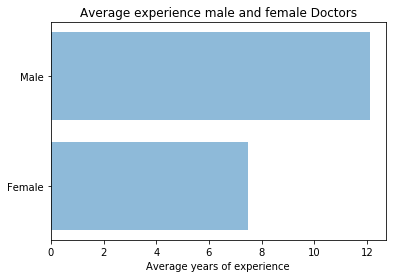

In [39]:
#Objects = gives the labels for the inserted data
#Performance = insert the data that corresponds to the labels under objects
#plt.xlabel = Name the x axis
#plt.title = Name the graph
objects = ("Female", "Male")
y_pos = np.arange(len(objects))
performance = [7.491, 12.103]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average years of experience')
plt.title('Average experience male and female Doctors')

Text(0.5,1,'Average Salary male and female Doctors')

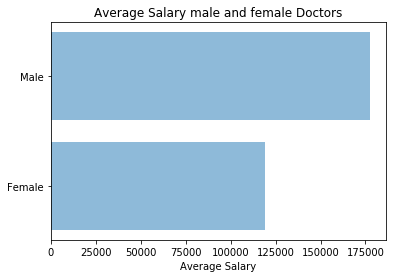

In [40]:
#Objects = gives the labels for the inserted data
#Performance = insert the data that corresponds to the labels under objects
#plt.xlabel = Name the x axis
#plt.title = Name the graph
objects = ("Female", "Male")
y_pos = np.arange(len(objects))
performance = [118871.27, 177338.76]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Salary')
plt.title('Average Salary male and female Doctors')

In [41]:
#allows for the grouping of variables for different dataframes.
#it allos the grouping of a maximum of 2 variables.
#It is also possible to alter what is grouped --> .count(), .mean(), .sum()
df_femalelawsuit1.groupby(['Rank']).count()

,Cert,Exper,Gender,Sal94,Sal95
Rank,,,,,
1,69,69,69,69,69
2,21,21,21,21,21
3,16,16,16,16,16


In [42]:
#allows for the grouping of variables for different dataframes.
#it allos the grouping of a maximum of 2 variables.
#It is also possible to alter what is grouped --> .count(), .mean(), .sum()
df_malelawsuit1.groupby(['Rank']).count()

,Cert,Exper,Gender,Sal94,Sal95
Rank,,,,,
1,43,43,43,43,43
2,43,43,43,43,43
3,69,69,69,69,69


Below a graph is displayed that shows the ranks of the Doctors in the Houston College. It is immediately clear that the number of males that have a higher rank is higher. As it can be seen on the first pie chart below, it is however the case that the total percentage of male doctors is higher. Therefore checking the percentage of male versus female for every rank should give a clearer image. 


|         | # Male       | % Male  |# Female|   % Female   | # Total       | % Total|
| --------|:------------:|:------: |:------:|:------------:|:-------------:|:------:|
| Rank 1  |     43       |  38.4 % |  69    |    61.6 %    |   112         | 42.9 % |
| Rank 2  |     43       |  67.2 % |  21    |    32.8 %    |   64          | 24.5 % |
| Rank 3  |     69       |  81.2 % |  16    |    18.8 %    |   85          | 32.6 % |


The percentage of men and women refers to the percentage given a certain rank. While total percentage refers to the percentage of male and female doctors that are within a rank. For male a progressive line can be seen when rank increases, while for female the exact opposite is happening. The devision is not according to the total percentage of female and male doctors. This is therefore an indication of discrimination against women. 

Text(0.5,1,'Average Ranks for Male and Female Doctors')

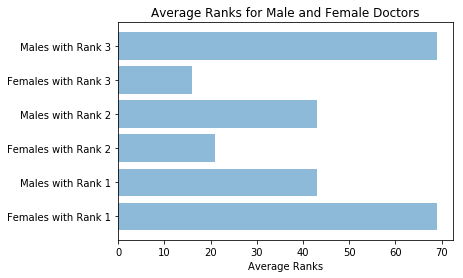

In [43]:
#Objects = gives the labels for the inserted data
#Performance = insert the data that corresponds to the labels under objects
#plt.xlabel = Name the x axis
#plt.title = Name the graph
objects = ("Females with Rank 1", "Males with Rank 1", "Females with Rank 2", "Males with Rank 2", "Females with Rank 3", "Males with Rank 3")
y_pos = np.arange(len(objects))
performance = [69, 43, 21, 43, 16, 69]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Ranks')
plt.title('Average Ranks for Male and Female Doctors')

In [44]:
#allows for the grouping of variables for different dataframes.
#it allos the grouping of a maximum of 2 variables.
#It is also possible to alter what is grouped --> .count(), .mean(), .sum()
df_lawsuit.groupby(['Gender']).count()

,ID,Dept,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
Gender,,,,,,,,,
0,106,106,106,106,106,106,106,106,106
1,155,155,155,155,155,155,155,155,155


In [45]:
#allows for the grouping of variables for different dataframes.
#it allos the grouping of a maximum of 2 variables.
#It is also possible to alter what is grouped --> .count(), .mean(), .sum()
df_malelawsuit1.groupby(['Cert']).sum()

,Exper,Gender,Rank,Sal94,Sal95
Cert,,,,,
0,426,37,80,4172988,4580315
1,1450,118,256,23314520,25631369


In [46]:
#allows for the grouping of variables for different dataframes.
#it allos the grouping of a maximum of 2 variables.
#It is also possible to alter what is grouped --> .count(), .mean(), .sum()
df_femalelawsuit1.groupby(['Cert']).count()

,Exper,Gender,Rank,Sal94,Sal95
Cert,,,,,
0,36,36,36,36,36
1,70,70,70,70,70


Next, three pie charts will be displayed. The first pie chart shows the percentage of male and female doctors in the College.  Namely, 40.6% is female, 59.4% is male. The second pie chart shows the percentage of male doctors that are part of the board. Only 23.9 percent of the male doctors are not part of the board. The last pie chart indicates how many female doctors are board certified. This is only 66%, which is considerably lower than their male counterparts. The data that is used for this can be found in the three tables above. The first one corresponds to the first pie chart, the second to the second pie chart. The same goes for the third table.

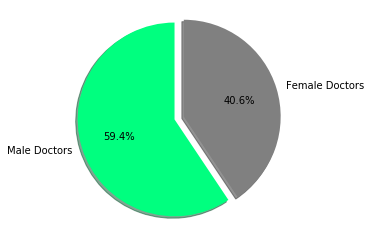

In [47]:
#Name labels according to the data that they represent.
#Give the data in numbers (not percentages, the program calculated percentages for you), corresponding to their labels.
#Choose colors of the Pie Chart
#insert a positive value between 0 and 1 under explode this will set the different parts of the pie chart apart from one another.
labels ='Male Doctors', 'Female Doctors'
sizes = [155, 106]
colors = ['springgreen', 'grey']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct= '%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

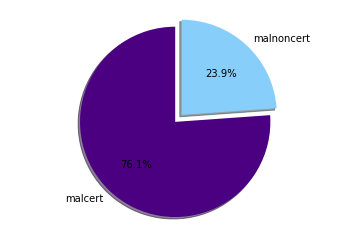

In [48]:
#Name labels according to the data that they represent.
#Give the data in numbers (not percentages, the program calculated percentages for you), corresponding to their labels.
#Choose colors of the Pie Chart
#insert a positive value between 0 and 1 under explode this will set the different parts of the pie chart apart from one another.
labels ='malcert', 'malnoncert'
sizes = [118, 37]
colors = ['indigo', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct= '%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

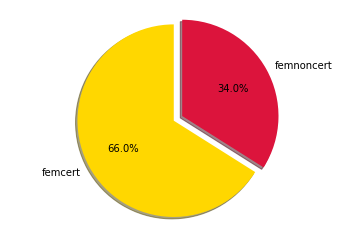

In [49]:
#Name labels according to the data that they represent.
#Give the data in numbers (not percentages, the program calculated percentages for you), corresponding to their labels.
#Choose colors of the Pie Chart
#insert a positive value between 0 and 1 under explode this will set the different parts of the pie chart apart from one another.
labels = 'femcert', 'femnoncert'
sizes = [70, 36]
colors = ['gold', 'crimson']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct= '%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

# Assumptions

Assumptions on the data were made, in order to be able to conduct the Mann Whitney U test and the Fisher’s exact test. 

The first assumption that was made is that in case a male and a female doctor are both ranked either 1, 2 or 3. Their duties and thus the total devision of teaching versus research, either clinically or not, is equal. In reality this may be different, and could therefore play a role in salary determination.
Another aspect that might influence this is how influential your research is. In case it is very influential it gives the College a better image. This may be very relevant for fundamental aspects of the College. Like the collection of funding capital and the attraction of students as well as other valuable Doctors. Hence, if your research is more influential, your salary is also likely to be higher. Here it is assumped that for this, no differentiation needs to be made and all research can be considered equal.

Furthermore, the assumption is made that all doctors have equal working hours, for example 1.0 fte. Or that the data represent a situation in which they ar converted to a state where this is the case. This is however questionable for the data that we are presented with, since working hours are not provided.

Also, it is unclear if the salaries are purely made up out of hourly wage or if a doctor can get certain bonusses as well. These could be awarded for a wide variety of reason. One might be some form of attendance fee. In case you were sick less than 10 days in a year, you might get additional salary. In case this is present, it could be that women are sick more often. This would then also contribute to the income differences.

In addition to this it is assumed that the six departmemts can be compared with one another. However, being part of a specific department could also lead to differences in salary. It could for example be the case that differences between ranks within different departments are present. As well as the percentage of males and females within a department, it should be assumed that this is equal between all the departments. 

# Conclusion

We tried to find if female doctors in The Houston College of Medicine are being discriminated against in giving promotions and setting salaries compared to their male counterparts in 1994 and 1995. First, we wanted to test if such a difference can be observed in salaries of female and male doctors. We took the average of the salaries of both genders. The average salary of female doctors is 118871 in 1994 and 130876 in 1995 whereas the average salary of male doctors is 177338 in 1994 and 194914 in 1995. So there is a big difference between salaries of female and male doctors. Then we wanted to test if it is statistically significantly different. The result is unsurprising, the difference of salaries of male and female doctors are statistically significantly different in both years.

Next, we wanted to find if there is any reason of this salary gap between female and male doctors or it is only due to discrimination. We determined the inputs in the data that could be affect the salaries. 
First we checked the average years of experience since it could affect the salary. The mean year of experience of male doctors is 12 whereas the mean year of experience of female doctors is 7.5. We tested and we found there is a statistically significantly difference of the years of experience of male and female doctors. So it could be one of the reasons of the salary gap between female and male doctors since the experience affect salaries very strongly.
Second we checked if the fraction of being on the board is the same for both genders since it could affect the salaries. We found a statistically significantly difference in this case as well. Lastly, a reason for the salaries of male doctors to be higher could be the fact that their ranks are much higher than those of the female doctors. Higher ranks are accompanied with a higher wage. So, this can (partly) explain why the male doctors have a higher wage. It is however unclear from the same graph how the awarding of ranks takes place. Assuming males and females are equally talented, it would be more logical that the number of male and female doctors within a certain rank are more or less according to the same ratio as they are on average ( so in every rank 40/60 ratio). It is clear that this is not the case this might be an indication that some form of discrimination is indeed taking place. So the effect of it is ambigiuous. 

Male doctors have got more experience in average and a larger fraction of them is board certified. This data is explanatory as to why makes have a higher salary.However, the salary gap is very huge and we can not explain these gap only with this data. We think that these factors could explain a part of the salary gap but there could be also a discrimination against female doctors in salaries. For example it could be that there is a glass ceiling, which means being promoted to a higher rank is more difficult for woman then for man. So the average salary of woman is less than the average salary of man because male doctors can be situated in the higher positions more easily. 